# Análise de Dados - Iris e Hospital

## Importação das Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import zipfile

---

# QUESTÃO 1: Análise do Conjunto de Dados "Iris"

### Carregando os dados

In [ ]:
with zipfile.ZipFile('iris.zip', 'r') as z:
    with z.open('iris.data') as f:
        iris_df = pd.read_csv(f, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

### a) Calcular a matriz de correlação

In [ ]:
correlation_matrix = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
print(correlation_matrix)

### b) Gerar um scatter plot

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['petal_length'], iris_df['petal_width'])
plt.title('Gráfico de Dispersão: Comprimento vs. Largura da Pétala')
plt.xlabel('Comprimento da Pétala (cm)')
plt.ylabel('Largura da Pétala (cm)')
plt.grid(True)
plt.show()

### Análise da Correlação

Observando tanto a matriz de correlação (item a) quanto o gráfico de dispersão, podemos concluir que existe uma **alta correlação positiva** entre o comprimento e a largura da pétala. O coeficiente de correlação é de **0.96**, um valor muito próximo de 1. O gráfico confirma visualmente essa forte relação, mostrando que, à medida que o comprimento da pétala aumenta, a largura da pétala também tende a aumentar de forma linear.

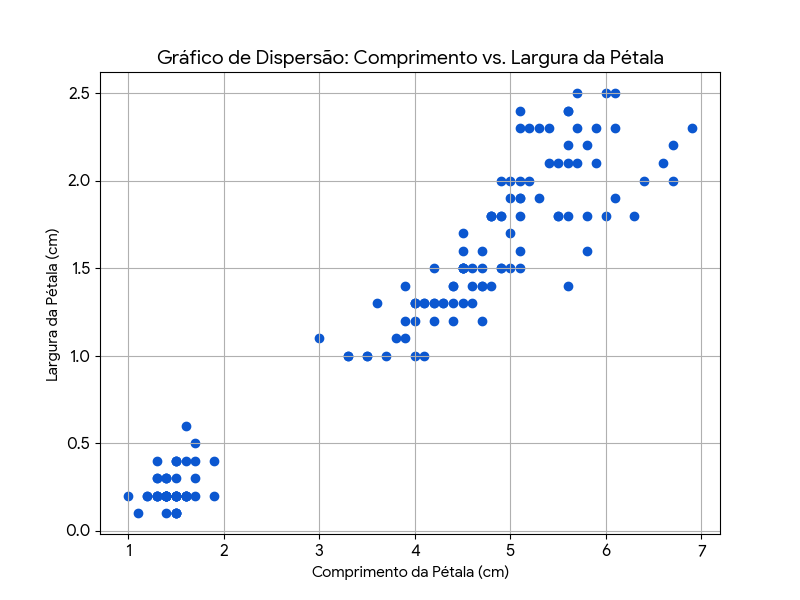

---

# QUESTÃO 2: Análise do Conjunto de Dados "hospital"

### Carregando os dados

In [ ]:
hospital_df = pd.read_csv('hospital.xlsx - Planilha1.csv')

### a) Calcular estatísticas univariadas

In [ ]:
# Para colunas categóricas
print('--- Frequências e Moda ---')
categorical_cols = ['SEXO', 'MANCHAS', 'EST.', 'DIAGNÓSTICO']
for col in categorical_cols:
    print(f'\n--- {col} ---')
    print('Frequências:')
    print(hospital_df[col].value_counts())
    print('\nModa:')
    print(hospital_df[col].mode().to_string(index=False))

# Para colunas numéricas
print('\n--- Estatísticas Descritivas ---')
numerical_cols = ['IDADE', 'PESO', 'TEMP.', '#INT.']
univariate_stats = hospital_df[numerical_cols].describe().rename(index={'50%': 'mediana', '25%': 'Q1', '75%': 'Q3'})
univariate_stats.loc['obliquidade'] = hospital_df[numerical_cols].skew()
univariate_stats.loc['curtose'] = hospital_df[numerical_cols].kurtosis()
print(univariate_stats)

### b) Calcular estatísticas multivariadas

In [ ]:
print('--- Matriz de Covariância ---')
print(hospital_df[numerical_cols].cov())

print('--- Matriz de Correlação ---')
print(hospital_df[numerical_cols].corr())

### c) Plotar boxplots e identificar outliers

In [ ]:
plt.figure(figsize=(12, 8))
hospital_df[numerical_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.suptitle('Boxplots dos Atributos Numéricos')
plt.show()

### Análise de Outliers

**IDADE:** O boxplot de 'IDADE' apresenta um ponto acima do limite superior, indicando a **presença de um outlier**.

**Outros Atributos:** 'PESO', 'TEMP.' e '#INT.' não apresentam outliers.

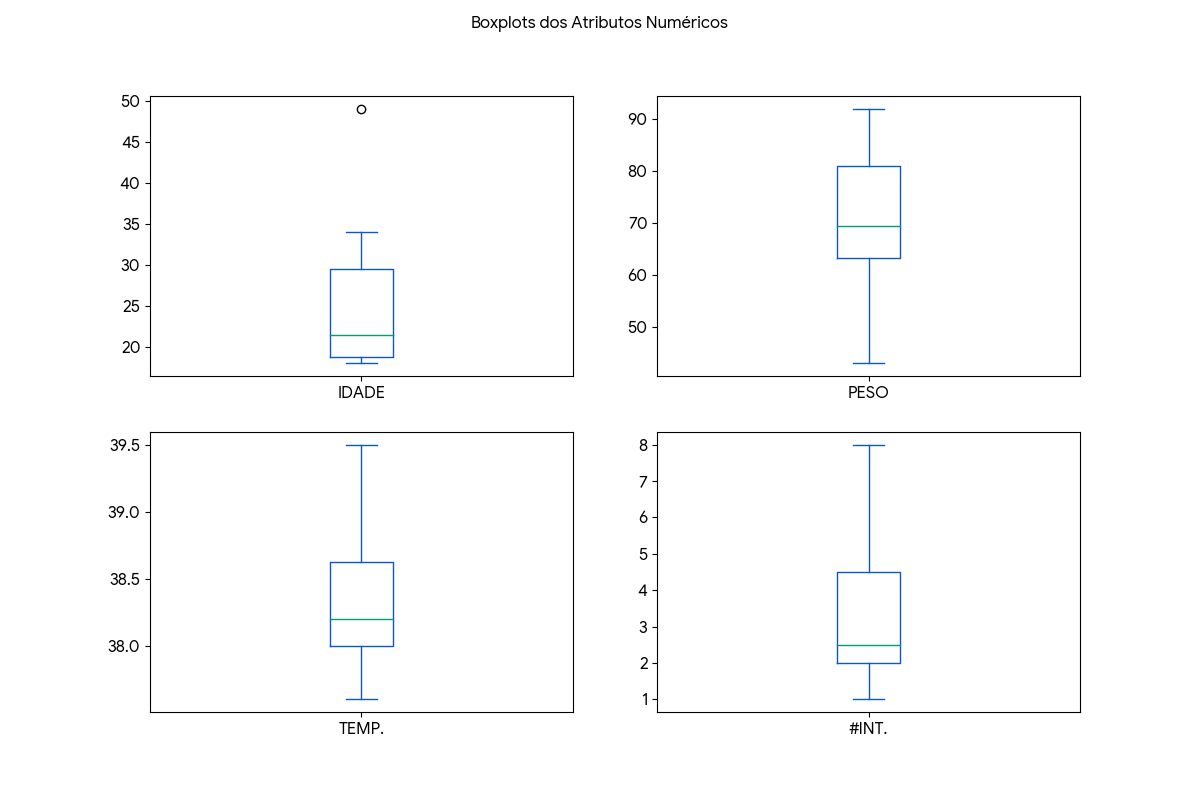

### d) Plotar histogramas dos atributos

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    for diagnosis in hospital_df['DIAGNÓSTICO'].unique():
        plt.hist(hospital_df[hospital_df['DIAGNÓSTICO'] == diagnosis][col], alpha=0.5, label=diagnosis)
    plt.title(f'Histograma de {col} por Diagnóstico')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Histogramas dos Atributos por Diagnóstico')
plt.show()

### Interpretação da Distribuição

**IDADE:** Pacientes "Doentes" tendem a ser mais jovens.

**TEMP.:** Pacientes "Doentes" tendem a apresentar temperaturas mais altas.

**#INT.:** O número de internações prévias parece ser maior no grupo de pacientes "Doentes".

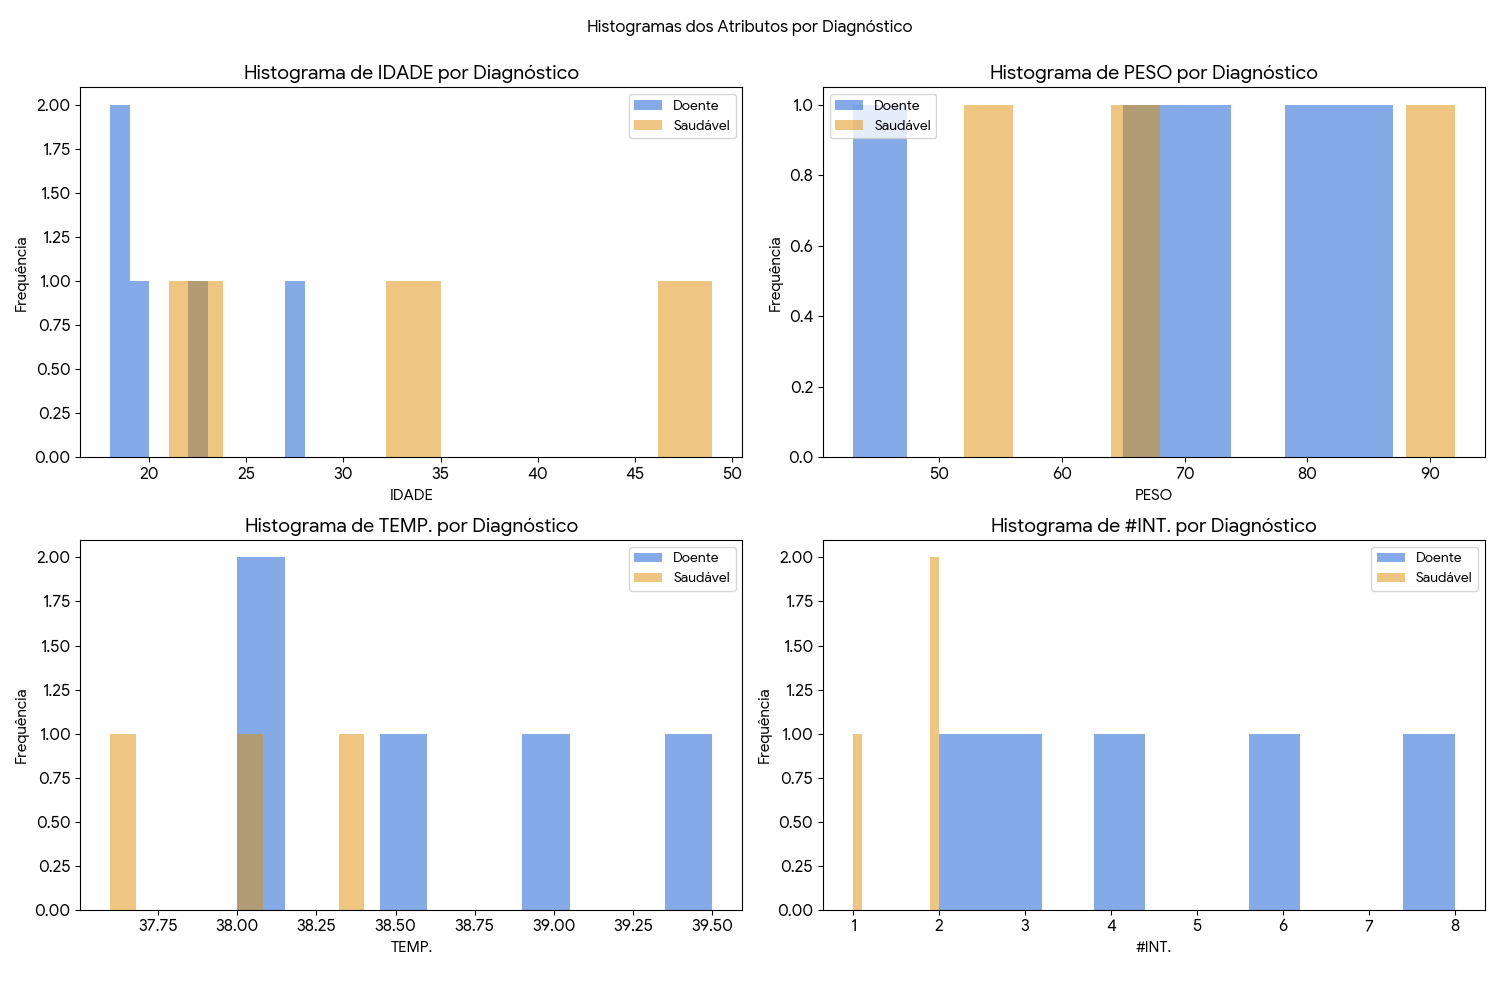